In [308]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
    import warnings


In [309]:
warnings.filterwarnings("ignore")

In [310]:
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [311]:
penguins_df.shape

(344, 5)

In [312]:
penguins_df.dtypes 

culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

## Chequeo de nulos

In [313]:
penguins_df.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [314]:
penguins = penguins_df.dropna(axis=0)

In [315]:
penguins.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## Chequeo de duplicados

In [316]:
penguins.duplicated().sum()

0

## Detección de outliers

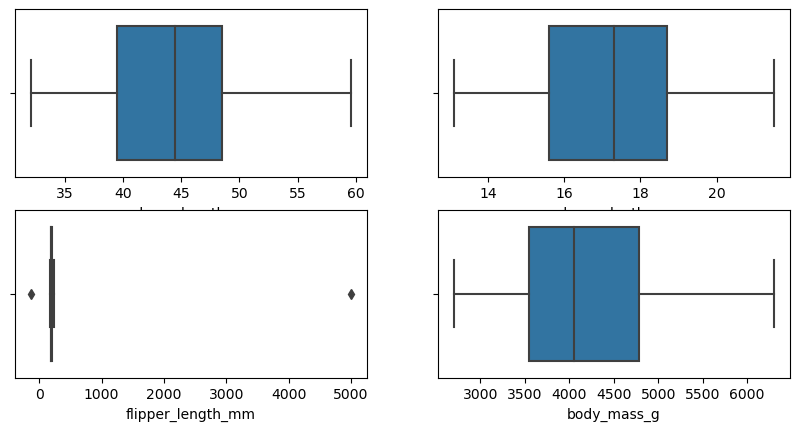

In [317]:
plt.figure(figsize = (10,10))
for i,col in enumerate(['culmen_length_mm','culmen_depth_mm', 'flipper_length_mm','body_mass_g']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = penguins )
plt.show()

In [318]:
percentile25 = penguins['flipper_length_mm'].quantile(0.25)
percentile75 = penguins['flipper_length_mm'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [319]:
upper_limit

247.5

In [320]:
lower_limit

155.5

In [321]:
penguins[penguins['flipper_length_mm'] > upper_limit]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
9,42.0,20.2,5000.0,4250.0,MALE


In [322]:
penguins[penguins['flipper_length_mm'] < lower_limit]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
14,34.6,21.1,-132.0,4400.0,MALE


In [323]:
penguins1 = penguins[(penguins['flipper_length_mm'] < upper_limit) & (penguins['flipper_length_mm'] >  lower_limit)]


In [324]:
penguins1.shape

(333, 5)

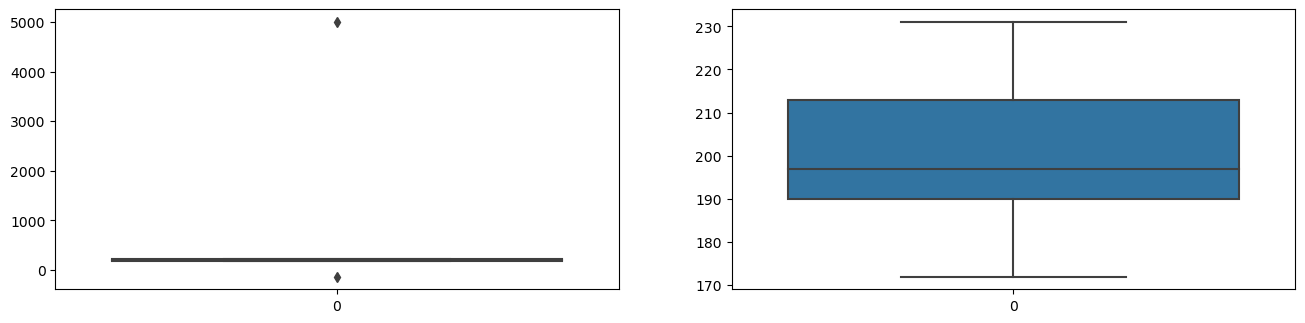

In [325]:
#Check
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(penguins['flipper_length_mm'])
plt.subplot(2,2,2)
sns.boxplot(penguins1['flipper_length_mm'])
plt.show()

## Variables categóricas

In [326]:
df = pd.get_dummies(penguins1 , drop_first  = True).drop("sex_FEMALE", axis=1)
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,1


## Scaling

In [327]:
scaler = StandardScaler()
X = scaler.fit_transform(df)
penguins_preprocessed = pd.DataFrame(data=X, columns=df.columns)
penguins_preprocessed.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,0.997001
5,-0.942311,0.333002,-1.428125,-0.725033,-1.003008
6,-0.887125,1.253249,-0.429637,0.579691,0.997001
7,-0.537611,0.230753,-1.356804,-1.253136,-1.003008
8,-0.997497,2.071247,-0.714919,-0.507579,0.997001
9,-1.365406,0.333002,-1.142843,-0.631839,-1.003008


## PCA

In [328]:
pca = PCA()
penguins_PCA = pca.fit_transform(penguins_preprocessed)

In [329]:
#Análisis de la varianza explicada para cada componente
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.56775484, 0.28184749, 0.09627279, 0.03425014, 0.01987475])

## Detectar el número óptimo de grupos 

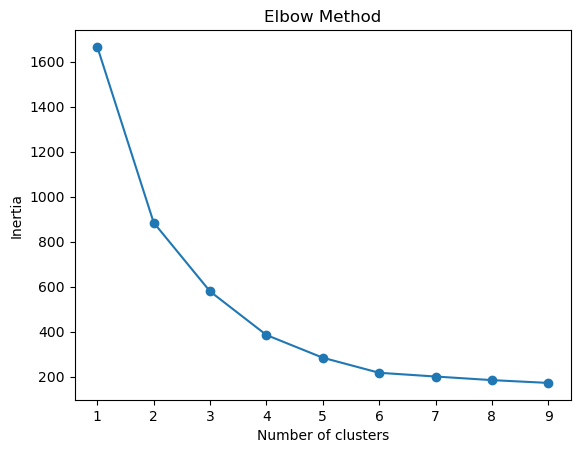

In [330]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


## Model Building - KMeans

In [331]:
n_clusters=4

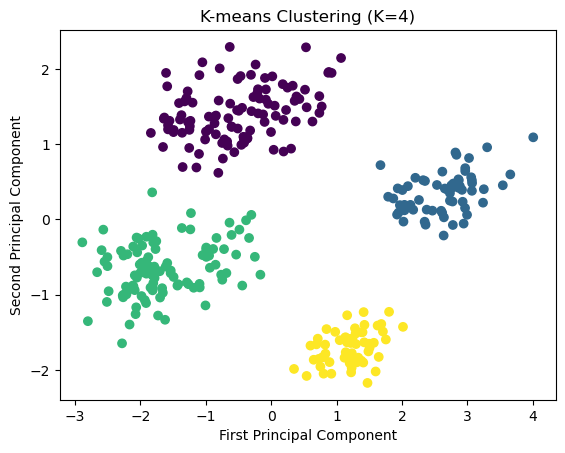

In [332]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap="viridis")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"K-means Clustering (K={n_clusters})")
plt.show()

In [333]:
from sklearn.metrics import silhouette_score
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(penguins_PCA)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, labels)
    print(f"For k = {k}, the average silhouette score is {silhouette_avg:.2f}")

For k = 2, the average silhouette score is 0.44
For k = 3, the average silhouette score is 0.45
For k = 4, the average silhouette score is 0.51
For k = 5, the average silhouette score is 0.52
For k = 6, the average silhouette score is 0.52
For k = 7, the average silhouette score is 0.48
For k = 8, the average silhouette score is 0.42
For k = 9, the average silhouette score is 0.36


**El método de Silhouette se utiliza para evaluar la calidad de la agrupación resultante de un algoritmo como K-Means, donde valores más altos de Silhouette indican una mejor separación entre los grupos.**

## by María Belen Camandone